### Imports

In [2]:
import pandas as pd

### Load Data

In [3]:
mandates = pd.read_csv("U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")

In [4]:
mask_usage = pd.read_csv("mask-use-by-county.csv")

In [5]:
conv_conf_cases = pd.read_csv("CONVENIENT_us_confirmed_cases.csv")
conv_meta = pd.read_csv("CONVENIENT_us_metadata.csv")
raw_conf_cases = pd.read_csv("RAW_us_confirmed_cases.csv")

/Users/castle/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,24

### Given Data

In [6]:
county = "Worcester"
state = "Massachusetts"
area_km2 = 3912.88
area_mi2 = 1510.77
pop_2020 = 862111
pop_incr_2010 = 63559

### Explore & Filter Data

View the first 5 rows for mandates in Worcester County, MA

In [7]:
mandates[(mandates["County_Name"].str.contains(county)) & (mandates["State_Tribe_Territory"] == "MA")].head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
327191,MA,Worcester County,25,27,4/10/2020,2,NaN,NaN,NaN,NaN
327192,MA,Worcester County,25,27,4/11/2020,2,NaN,NaN,NaN,NaN
327193,MA,Worcester County,25,27,4/12/2020,2,NaN,NaN,NaN,NaN
327194,MA,Worcester County,25,27,4/13/2020,2,NaN,NaN,NaN,NaN
327195,MA,Worcester County,25,27,4/14/2020,2,NaN,NaN,NaN,NaN


Filter mandates to Worcester County, MA and select subset of columns, some formatted or renamed

In [8]:
worcester_mandates = mandates[(mandates["County_Name"].str.contains(county)) & (mandates["State_Tribe_Territory"] == "MA")][["date", "Face_Masks_Required_in_Public", "Source_of_Action", "URL"]]
worcester_mandates["date"] = pd.to_datetime(worcester_mandates["date"], infer_datetime_format=True)
worcester_mandates.columns = ["Date", "Face_Masks_Required_in_Public", "Source_of_Action", "URL"]

Review dates that mandates were present in Worcester County, MA 

In [9]:
worcester_mandates[worcester_mandates["Face_Masks_Required_in_Public"] == "Yes"]

,Date,Face_Masks_Required_in_Public,Source_of_Action,URL
327217,2020-05-06,Yes,Official,https://www.mass.gov/doc/may-1-2020-masks-and-...
327218,2020-05-07,Yes,Official,https://www.mass.gov/doc/may-1-2020-masks-and-...
327219,2020-05-08,Yes,Official,https://www.mass.gov/doc/may-1-2020-masks-and-...
327220,2020-05-09,Yes,Official,https://www.mass.gov/doc/may-1-2020-masks-and-...
327221,2020-05-10,Yes,Official,https://www.mass.gov/doc/may-1-2020-masks-and-...
...,...,...,...,...
1139331,2021-05-24,Yes,Official,https://www.mass.gov/doc/covid-19-order-67/dow...
1139332,2021-05-25,Yes,Official,https://www.mass.gov/doc/covid-19-order-67/dow...
1139333,2021-05-26,Yes,Official,https://www.mass.gov/doc/covid-19-order-67/dow...
1139334,2021-05-27,Yes,Official,https://www.mass.gov/doc/covid-19-order-67/dow...


Get urls to investigate contents of mandates to Worcester County, MA 

In [10]:
worcester_mandates[worcester_mandates["Face_Masks_Required_in_Public"] == "Yes"]["URL"].unique()

array(['https://www.mass.gov/doc/may-1-2020-masks-and-face-coverings/download',
       'https://www.mass.gov/doc/signed-amended-penalty-provision-no-48/download',
       'https://www.mass.gov/doc/guidance-for-face-masks-in-public-settings/download',
       'https://www.mass.gov/doc/covid-19-order-67/download'],
      dtype=object)

Confirm mask mandate in Worcester County, MA was continuous within the min and max dates

In [11]:
worcester_mandates[(worcester_mandates["Date"] > '2020-05-05') & (worcester_mandates["Date"] < '2021-05-29')]["Face_Masks_Required_in_Public"].unique()

array(['Yes'], dtype=object)

In [12]:
worcester_mandates[(worcester_mandates["Date"] < '2020-05-06') | (worcester_mandates["Date"] > '2021-05-28')]["Face_Masks_Required_in_Public"].unique()

array([nan, 'No'], dtype=object)

Locate Worcester County, MA column by transposing and filtering

In [13]:
conv_conf_cases.T[conv_conf_cases.T[0] == "Worcester"]

,0,1,2,3,4,5,6,7,8,9,...,640,641,642,643,644,645,646,647,648,649
Maryland.25,Worcester,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,5.0,10.0,7.0,0.0,17.0,5.0,8.0,1.0,3.0
Massachusetts.16,Worcester,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,489.0,128.0,163.0,0.0,377.0,0.0,0.0,482.0


Select and rename subset of columns and format date

Note: I also did not know that we were meant to only use the 'RAW' variation of the data until it came up in a thread on Slack. 

In [15]:
worcester = conv_conf_cases[["Province_State", "Massachusetts.16"]].iloc[1:]
worcester.columns = ["Date", "NewConfirmedCases"]

worcester["Date"] = pd.to_datetime(worcester["Date"], infer_datetime_format=True)
worcester["NewConfirmedCases"] = pd.to_numeric(worcester["NewConfirmedCases"])

worcester

,Date,NewConfirmedCases
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
...,...,...
645,2021-10-28,0.0
646,2021-10-29,377.0
647,2021-10-30,0.0
648,2021-10-31,0.0


Negative new cases was a known issue documented on kaggle. Here I checked if it applied to my county. Only one day was noticibly affected, however if we interpret these as corrections being applied then on a day when they were sufficient cases to cancel that out this indication would not show up.

In [16]:
worcester[worcester["NewConfirmedCases"] < 0]

,Date,NewConfirmedCases
225,2020-09-03,-48.0


Select and rename subset of columns and format date

In [58]:
raw_worcester = raw_conf_cases[(raw_conf_cases["Province_State"] == "Massachusetts") & (raw_conf_cases["Admin2"] == "Worcester")]#.iloc[10:]#.T
raw_worcester = raw_worcester.T.iloc[11:].reset_index()
raw_worcester.columns = ["Date", "CumuConfirmedCases"]

raw_worcester["Date"] = pd.to_datetime(raw_worcester["Date"], infer_datetime_format=True)
raw_worcester["CumuConfirmedCases"] = pd.to_numeric(raw_worcester["CumuConfirmedCases"])

raw_worcester

,Date,CumuConfirmedCases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
645,2021-10-28,95600
646,2021-10-29,95977
647,2021-10-30,95977
648,2021-10-31,95977


FIPS State concatenated with FIPS county (3 digits) equals 25027

Snapshot survey conducted between July 2-14, 2020 - weighted averages aggregated to county level

In [17]:
mask_usage[mask_usage["COUNTYFP"] == 25027]

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1230,25027,0.02,0.027,0.043,0.142,0.768


### Join Data

Join all time series data

In [18]:
full_df = worcester.merge(raw_worcester, on="Date", how="outer")
full_df = full_df.merge(worcester_mandates, on="Date", how="outer")
full_df

NameError: name 'raw_worcester' is not defined

### Analysis

Derive several metrics from number of cases and population, then filter

In [208]:
full_df["RollingAverage"] = full_df["NewConfirmedCases"].rolling(window=7).mean().round()
full_df["RateOfChange"] = full_df["NewConfirmedCases"].diff()
full_df["RollingAverageRoC"] = full_df["RateOfChange"].rolling(window=7).mean().round()

full_df["ActiveCases"] = full_df["NewConfirmedCases"].rolling(window=10).sum().shift(-2)
full_df["AtRiskPop"] = pop_2020 - full_df["ActiveCases"]
full_df["InfectionRate"] = full_df["NewConfirmedCases"]/(full_df["AtRiskPop"]/10000)# * 100
full_df["RollingAverageIR"] = full_df["InfectionRate"].rolling(window=7).mean()

final_df = full_df[(full_df["Date"] > '2020-01-31') & (full_df["Date"] < '2021-10-16')]
final_df

,Date,NewConfirmedCases,CumuConfirmedCases,Face_Masks_Required_in_Public,Source_of_Action,URL,RollingAverage,RateOfChange,RollingAverageRoC,ActiveCases,AtRiskPop,InfectionRate,RollingAverageIR
9,2020-02-01,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,862111.0,0.000000,NaN
10,2020-02-02,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,862111.0,0.000000,NaN
11,2020-02-03,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,862111.0,0.000000,NaN
12,2020-02-04,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,862110.0,0.000000,NaN
13,2020-02-05,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,862110.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,2021-10-11,0.0,91796,NaN,NaN,NaN,139.0,0.0,-82.0,2541.0,859570.0,0.000000,1.619581
628,2021-10-12,707.0,92503,NaN,NaN,NaN,211.0,707.0,72.0,2274.0,859837.0,8.222489,2.456943
629,2021-10-13,286.0,92789,NaN,NaN,NaN,214.0,-421.0,2.0,2343.0,859768.0,3.326479,2.483566
630,2021-10-14,306.0,93095,NaN,NaN,NaN,218.0,20.0,5.0,2073.0,860038.0,3.557982,2.540052


### Visualize

In [159]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Plot the new cases, rolling average, and mask mandate period

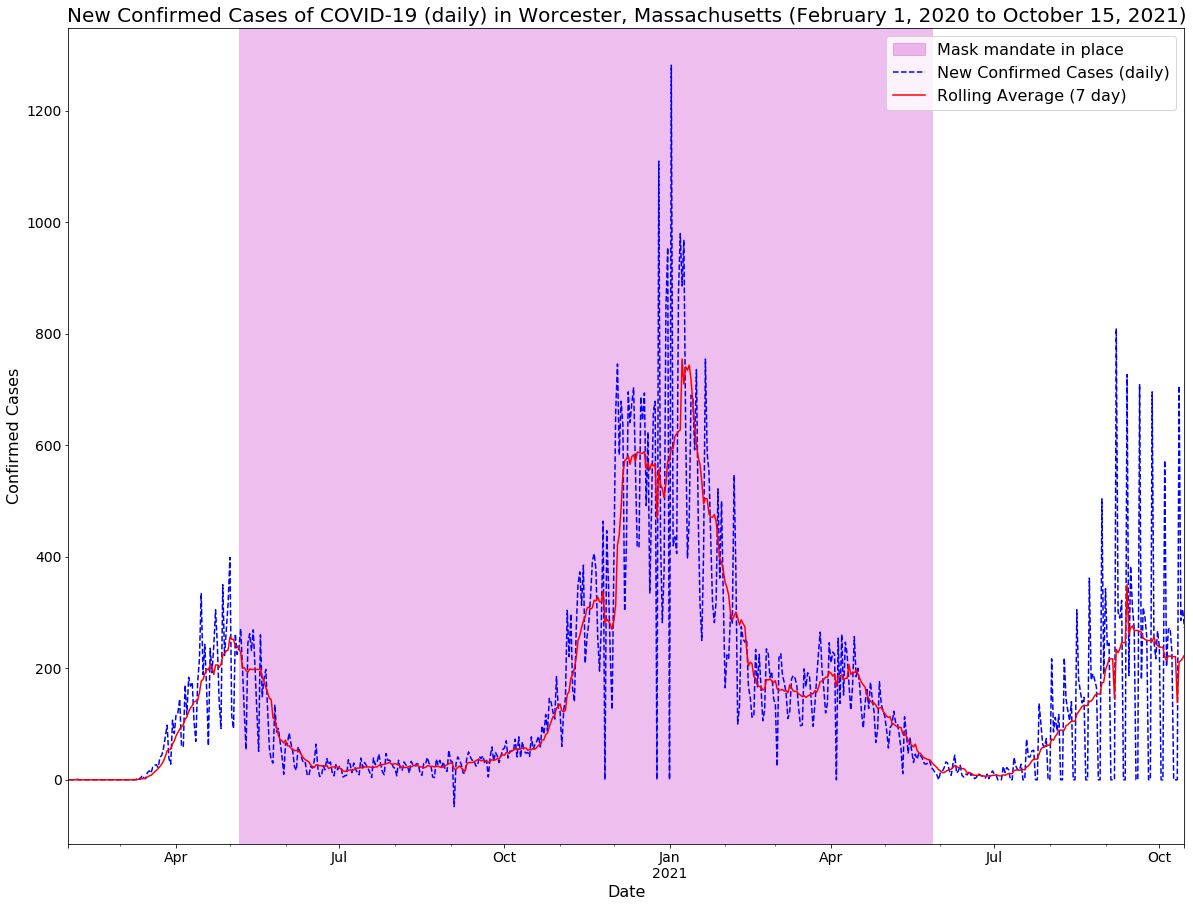

In [172]:
final_df[["Date", "NewConfirmedCases", "RollingAverage"]].plot(x="Date", figsize=(20,15), style=['b--', 'r-'])

legend_elements = [mpatches.Patch(color='m', alpha=0.25, label='Mask mandate in place')]
legend_elements.append(plt.Line2D((0,1),(0,0), color='b', marker='', linestyle='--', label='New Confirmed Cases (daily)'))
legend_elements.append(plt.Line2D((0,1),(0,0), color='r', marker='', linestyle='-', label='Rolling Average (7 day)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Date', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('Confirmed Cases', fontsize='16')
plt.yticks(fontsize='14')
plt.title('New Confirmed Cases of COVID-19 (daily) in Worcester, Massachusetts (February 1, 2020 to October 15, 2021)', fontsize='20')

plt.axvspan('2020-05-06', '2021-05-28', facecolor='m', alpha=0.25)
   
plt.show()

Plot the change in cases, rolling average, and mask mandate period

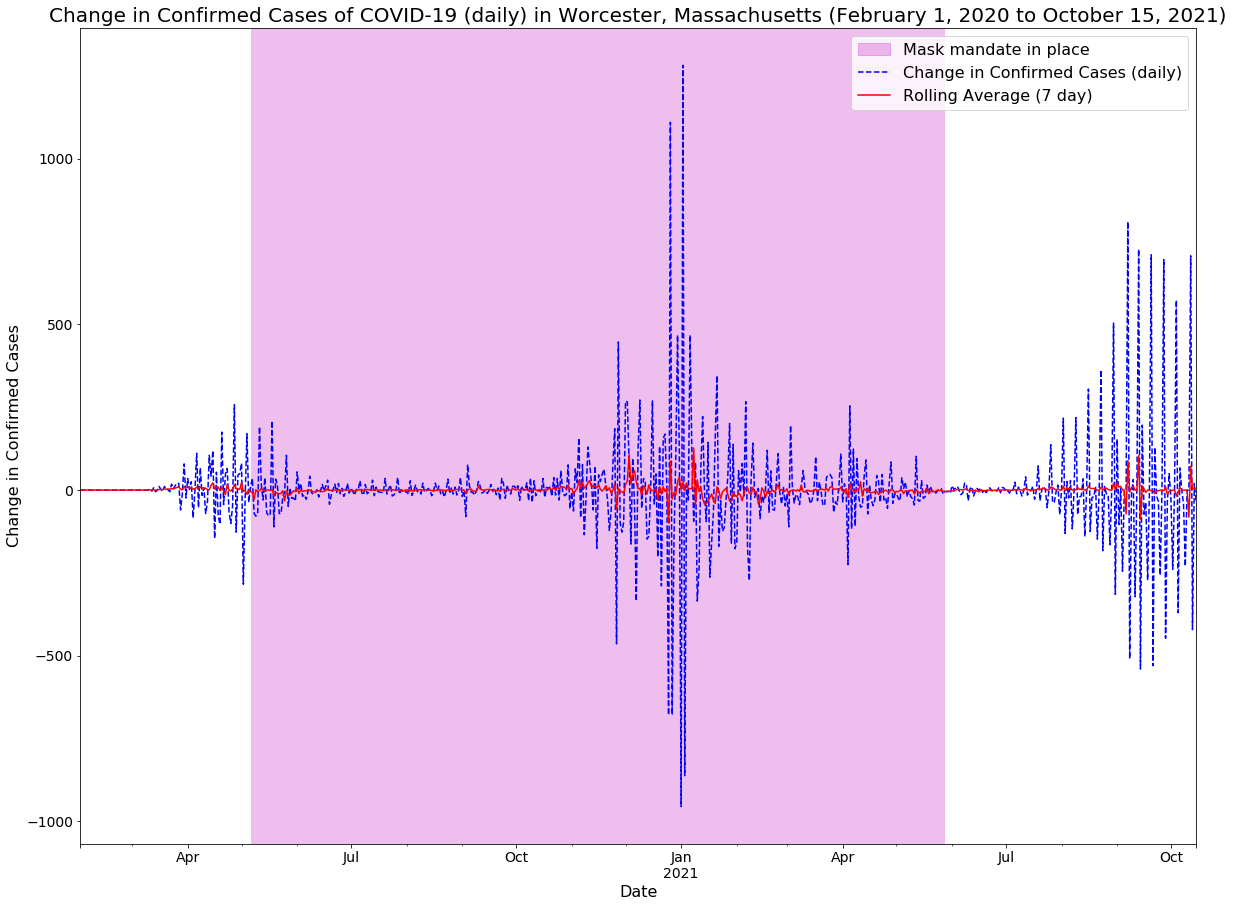

In [176]:
final_df[["Date", "RateOfChange", "RollingAverageRoC"]].plot(x="Date", figsize=(20,15), style=['b--', 'r-'])

legend_elements = [mpatches.Patch(color='m', alpha=0.25, label='Mask mandate in place')]
legend_elements.append(plt.Line2D((0,1),(0,0), color='b', marker='', linestyle='--', label='Change in Confirmed Cases (daily)'))
legend_elements.append(plt.Line2D((0,1),(0,0), color='r', marker='', linestyle='-', label='Rolling Average (7 day)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Date', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('Change in Confirmed Cases', fontsize='16')
plt.yticks(fontsize='14')
plt.title('Change in Confirmed Cases of COVID-19 (daily) in Worcester, Massachusetts (February 1, 2020 to October 15, 2021)', fontsize='20')

plt.axvspan('2020-05-06', '2021-05-28', facecolor='m', alpha=0.25)
    
plt.show()

Final Version: Plot the infection rate, rolling average, and mask mandate period

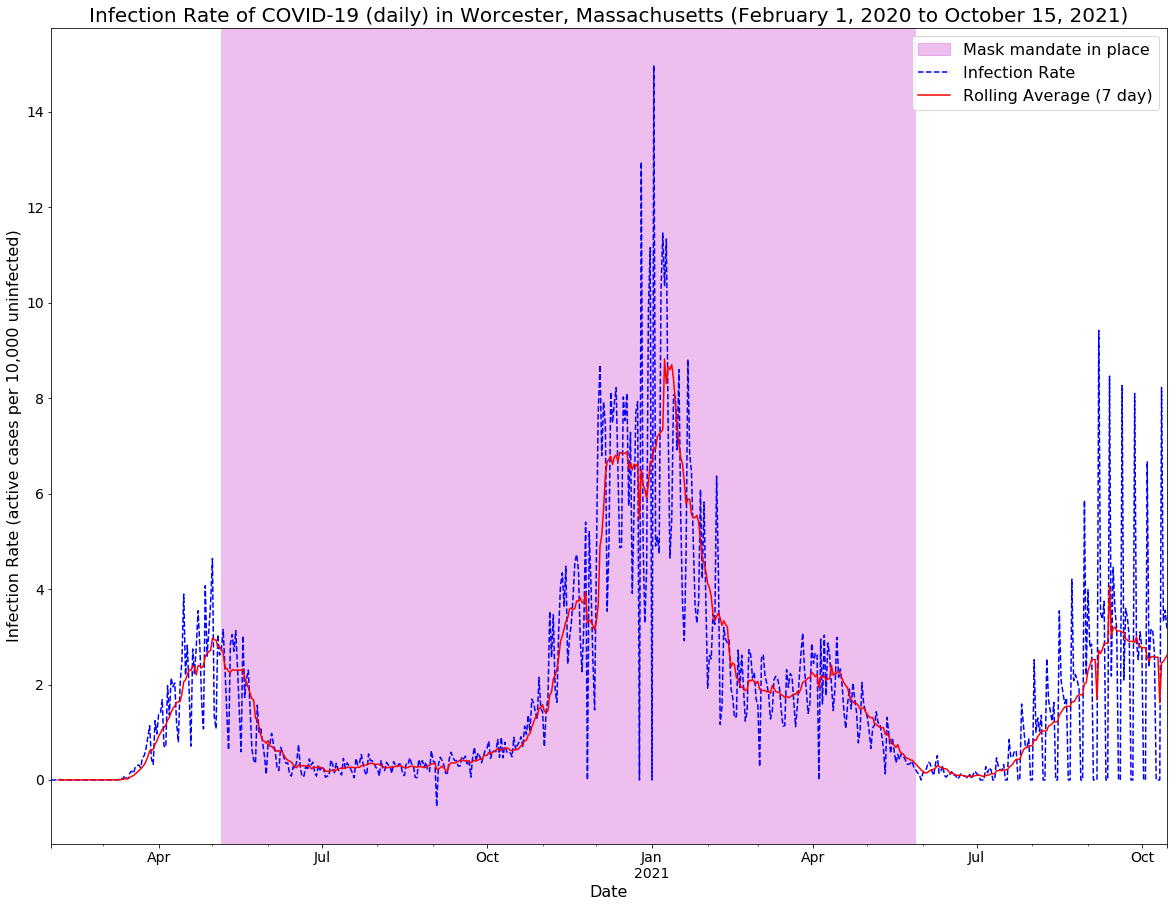

In [210]:
final_df[["Date", "InfectionRate", "RollingAverageIR"]].plot(x="Date", figsize=(20,15), style=['b--', 'r-'])

legend_elements = [mpatches.Patch(color='m', alpha=0.25, label='Mask mandate in place')]
legend_elements.append(plt.Line2D((0,1),(0,0), color='b', marker='', linestyle='--', label='Infection Rate'))
legend_elements.append(plt.Line2D((0,1),(0,0), color='r', marker='', linestyle='-', label='Rolling Average (7 day)'))
plt.legend(fontsize='16', handles=legend_elements)

plt.xlabel('Date', fontsize='16')
plt.xticks(fontsize='14')
plt.ylabel('Infection Rate (active cases per 10,000 uninfected)', fontsize='16')
plt.yticks(fontsize='14')
plt.title('Infection Rate of COVID-19 (daily) in Worcester, Massachusetts (February 1, 2020 to October 15, 2021)', fontsize='20')

plt.axvspan('2020-05-06', '2021-05-28', facecolor='m', alpha=0.25)

plt.savefig('WorcesterInfectionRate.png')    
plt.show()